In [3]:
import pickle
import numpy as np

data = pickle.load(open("output/dtm_processed_output.p", "rb" ))
topic_names = pickle.load(open("topicnames.p", "rb" ))

In [10]:
from matplotlib import pyplot as plt
% matplotlib inline

In [13]:
import seaborn as sns

In [2]:
[k for k,v in data.items()]

['term_topic',
 'doc_topic',
 'docnames',
 'terms',
 'docs_per_year',
 'doc_length',
 'term_frequency']

In [5]:
import pandas as pd

In [93]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [8]:
doc_topic_df = pd.DataFrame(data['doc_topic'], columns=topic_names)

In [70]:
doc_topic_df_shuffled = doc_topic_df.copy()


In [71]:
for i in range(doc_topic_df_shuffled.shape[0]):
    doc_topic_df_shuffled.iloc[i,:] = np.random.permutation(doc_topic_df_shuffled.iloc[i,:].values)

In [81]:
corr2 = doc_topic_df_shuffled.corr()
background_corr = corr2.values.flatten()[np.where(corr.values.flatten() < .9)].mean()

In [100]:
df = doc_topic_df.copy()

In [101]:
import scipy
import scipy.cluster.hierarchy as sch

X = df.corr().values
d = sch.distance.pdist(X)   # vector of ('55' choose 2) pairwise distances
L = sch.linkage(d, method='complete')
ind = sch.fcluster(L, 0.5*d.max(), 'distance')
columns = [df.columns.tolist()[i] for i in list((np.argsort(ind)))]
df = df.reindex_axis(columns, axis=1)



/Users/alex/anaconda/envs/wikiquote/lib/python3.6/site-packages/ipykernel/__main__.py:9: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.


/Users/alex/anaconda/envs/wikiquote/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


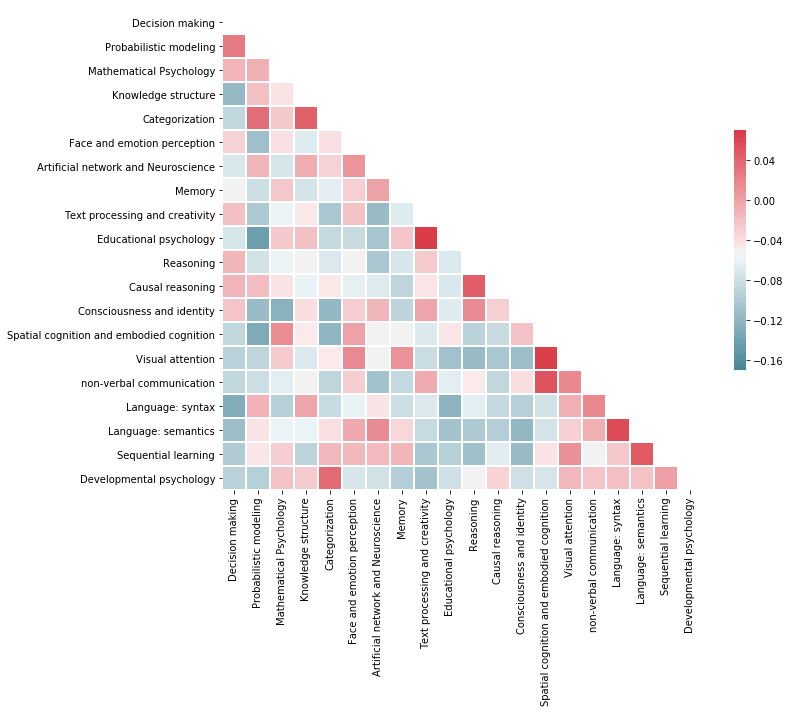

In [104]:
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns_plot = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.07, vmin=-.17, center=background_corr,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [105]:
fig = sns_plot.get_figure()
fig.savefig('figures/doctopic_correlation_matrix.png')